# 1. CARGA DE LIBRERIAS

In [ ]:
# Celda para importar las librerias necesarias
import numpy as np
import pandas as pd
import sklearn
import sys

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization, Activation, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.applications import VGG19, imagenet_utils
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. IMPLEMENTACION DE REDES NEURONALES.



## 2.1 CARGAMOS LOS DATASETS: TRAIN, VALIDATION Y TEST.

In [ ]:
airbnb_data_train = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_train_clean.csv', sep=';')
airbnb_data_val = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_val_clean.csv', sep=';')
airbnb_data_test = pd.read_csv('/content/drive/MyDrive/Keepcoding_DL/airbnb_test_clean.csv', sep=';')

In [ ]:
airbnb_data_train.head().T

0          1          2           3          4
log_price               5.010635   5.521461   5.686975    4.605170   5.298317
property_type           0.000000   0.000000   0.000000    0.000000   0.000000
room_type               0.000000   0.000000   0.000000    0.000000   0.000000
accommodates            5.000000   4.000000   3.000000    3.000000   2.000000
bathrooms               1.500000   1.000000   1.500000    1.000000   1.000000
bed_type                0.000000   0.000000   0.000000    0.000000   0.000000
cancellation_policy     1.000000   2.000000   0.000000    1.000000   1.000000
cleaning_fee            1.000000   1.000000   0.000000    1.000000   1.000000
city                    5.000000   4.000000   4.000000    4.000000   4.000000
latitude               37.773157  40.732454  40.746619   40.689938  40.743416
longitude            -122.423731 -74.002754 -73.989648  -73.921254 -73.976606
number_of_reviews       3.000000   3.000000   0.000000    3.000000   9.000000
review_scores_rating  100.000000  87.000000  93.836240  100.000000  98.000000
bedrooms                2.000000   0.000000   1.000000    1.000000   0.000000
beds                    3.000000   2.000000   1.000000    1.000000   2.000000
amenities_num          21.000000  11.000000  17.000000   19.000000  13.000000

In [ ]:
airbnb_data_val.head().T

0          1          2           3          4
log_price              4.700480   3.912023   6.109248    4.927254   4.787492
property_type          0.000000   5.000000   5.000000    5.000000   7.000000
room_type              1.000000   1.000000   0.000000    0.000000   1.000000
accommodates           1.000000   2.000000   7.000000    4.000000   2.000000
bathrooms              1.000000   1.000000   2.500000    1.000000   2.000000
bed_type               0.000000   0.000000   0.000000    0.000000   0.000000
cancellation_policy    0.000000   2.000000   2.000000    2.000000   2.000000
cleaning_fee           1.000000   1.000000   1.000000    1.000000   1.000000
city                   4.000000   4.000000   4.000000    3.000000   4.000000
instant_bookable       0.000000   1.000000   0.000000    0.000000   1.000000
latitude              40.781636  40.750257  40.683956   34.137489  40.809368
longitude            -73.952150 -73.828732 -73.989138 -118.367526 -73.949886
number_of_reviews      0.000000  33.000000   8.000000   38.000000  12.000000
review_scores_rating  93.836240  88.000000  98.000000   94.000000  97.000000
bedrooms               1.000000   1.000000   4.000000    1.000000   1.000000
beds                   1.000000   1.000000   5.000000    3.000000   1.000000
amenities_num         16.000000  13.000000  10.000000   23.000000  13.000000

In [ ]:
airbnb_data_test.head().T

0           1          2           3           4
log_price              4.653960    4.442651   5.273000    3.806662    5.010635
property_type          0.000000    0.000000   0.000000    0.000000    0.000000
room_type              0.000000    1.000000   0.000000    1.000000    0.000000
accommodates           2.000000    1.000000   3.000000    1.000000    2.000000
bathrooms              1.000000    1.000000   1.500000    1.000000    1.000000
bed_type               0.000000    0.000000   0.000000    0.000000    0.000000
cancellation_policy    1.000000    1.000000   0.000000    0.000000    1.000000
cleaning_fee           1.000000    1.000000   1.000000    1.000000    1.000000
city                   4.000000    4.000000   4.000000    4.000000    5.000000
instant_bookable       0.000000    1.000000   0.000000    0.000000    0.000000
latitude              40.721442   40.800237  40.691937   40.707233   37.768075
longitude            -73.989145  -73.968265 -73.959519  -73.949387 -122.445206
number_of_reviews     15.000000    1.000000  52.000000    1.000000   15.000000
review_scores_rating  91.000000  100.000000  96.000000  100.000000  100.000000
bedrooms               0.000000    1.000000   1.000000    1.000000    0.000000
beds                   1.000000    1.000000   1.000000    1.000000    1.000000
amenities_num         10.000000   24.000000  22.000000    9.000000   11.000000

## 2.2. PREPARACION DE LOS DATOS.

* Separamos la variable objetivo en los 3 datasets y las variables predictoras.
* Estandarizamos las variables predictoras con StandarScaler de Skelearn.
* Convertimos la variable objetivo diviendo por el valor máximo de train.

In [ ]:
# Preparar carcterísticas y variable objetivo
# Dataset de train
features = airbnb_data_train.columns.drop(['log_price'])

y_train = airbnb_data_train['log_price'].values
X_train = airbnb_data_train[features].values

# Dataset de validation
y_val = airbnb_data_val['log_price'].values
X_val = airbnb_data_val[features].values

# Dataset de test
y_test = airbnb_data_test['log_price'].values
X_test = airbnb_data_test[features].values

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XvalScaled = scaler.transform(X_val)
XtestScaled = scaler.transform(X_test)

print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos de validacion: ', XvalScaled.shape)
print('Datos test: ', XtestScaled.shape)

#Hacemos lo mismo para las etiquetas.
print("El conjunto de entrenamiento (etiquetas) tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) tiene dimensiones: ",y_test.shape)


Datos entrenamiento:  (1366, 15)
Datos de validacion:  (342, 15)
Datos test:  (427, 15)
El conjunto de entrenamiento (etiquetas) tiene dimensiones:  (1366,)
El conjunto de validación (etiquetas) tiene dimensiones:  (342,)
El conjunto de test (etiquetas) tiene dimensiones:  (427,)


## 2.3. CREAR FUNCION PARA IMPLEMENTAR MLP:

He creado una función a la que le vamos a pasar la función de activación, el learning rate, el decay del learning rate, el batch_size y el número de epochs. De esta forma podremos hacer cambios en estos parámetros sin tener que cambiar todo.

También definimos algunas metricas para ver que tal funciona y una gráfica que nos muestre la pérdida y las metricas seleccionadas.

Para todo esto vamos a usar Keras.


### 2.3.1 PRIMERA RED
Primer MLP sin ajustes.

In [ ]:
# PRIMERA RED
def train_network_features1(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  # Implementamos una red secuencial con Keras.
  # Instanciar la red secuencial.
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
)
  model = Sequential()

  model.add(Input(shape=(15,), name="TF1IN"))

  model.add(Dense(100, input_shape = (15,),
                  activation = activation_function,
                  kernel_initializer='random_uniform',
                  bias_initializer='zeros',
                  name = 'TNF1_1'))
  model.add(Dense(50, input_shape = (100,),
                  activation = activation_function,
                  name = 'TNF1_2'))
  model.add(Dense(10, input_shape = (50,), activation=activation_function,
                  name = 'TNF1_3'))

  model.add(Dense(1, input_shape = (10,), activation="linear", name = 'TNF1Out'))

  # Compilamos y entrenamos un modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
    # Implementar un callback para el decay:
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1,
      decay_rate=lr_decay)

  model.compile(loss= loss, optimizer=Adam(learning_rate=lr_schedule), metrics=metrics)



  # Entrenar la solución
  H = model.fit(XtrainScaled, y_train,
                validation_data=(XvalScaled, y_val),
                epochs=num_epochs,
                batch_size=batch_size,
                callbacks = [earlyStopping_callback])
  model.summary()

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(XtestScaled, y_test, verbose=0) # Metricas

  preds = model.predict(XtestScaled, batch_size=batch_size) # Predicciones

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = mean_squared_error(y_test, preds, squared=False)
  r2 = r2_score(y_test, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Desviación del precio:", error_price)
  print("R² (Coefficient of Determination):", r2)
  print('----------------------------------')

 # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()

In [ ]:
# PRUEBA 1
activation_function = tf.nn.relu
learning_rate = 0.001
lr_decay = 1e-3
num_epochs = 512
batch_size = 512
train_network_features1(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

[INFO]: Entrenando red neuronal...
Epoch 1/512
3/3 [==============================] - 1s 83ms/step - loss: 21.6577 - mean_absolute_error: 4.6040 - val_loss: 21.1512 - val_mean_absolute_error: 4.5489
Epoch 2/512
3/3 [==============================] - 0s 16ms/step - loss: 20.2312 - mean_absolute_error: 4.4475 - val_loss: 19.6424 - val_mean_absolute_error: 4.3806
Epoch 3/512
3/3 [==============================] - 0s 15ms/step - loss: 18.6767 - mean_absolute_error: 4.2706 - val_loss: 17.9685 - val_mean_absolute_error: 4.1856
Epoch 4/512
3/3 [==============================] - 0s 19ms/step - loss: 16.9812 - mean_absolute_error: 4.0677 - val_loss: 16.1590 - val_mean_absolute_error: 3.9634
Epoch 5/512
3/3 [==============================] - 0s 16ms/step - loss: 15.1290 - mean_absolute_error: 3.8330 - val_loss: 14.2209 - val_mean_absolute_error: 3.7093
Epoch 6/512
3/3 [==============================] - 0s 24ms/step - loss: 13.1623 - mean_absolute_error: 3.5649 - val_loss: 12.1611 - val_mean_abso


Voy a aumentar los epochs a ver si satura.

In [ ]:
# PRUEBA 2 (Aumento número de epochs)
activation_function = tf.nn.relu
learning_rate = 0.001
lr_decay = 1e-3
num_epochs = 512
batch_size = 512
train_network_features1(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

[INFO]: Entrenando red neuronal...
Epoch 1/512
3/3 [==============================] - 2s 123ms/step - loss: 22.6267 - mean_absolute_error: 4.7107 - val_loss: 22.1753 - val_mean_absolute_error: 4.6643
Epoch 2/512
3/3 [==============================] - 0s 31ms/step - loss: 21.3012 - mean_absolute_error: 4.5716 - val_loss: 20.8698 - val_mean_absolute_error: 4.5251
Epoch 3/512
3/3 [==============================] - 0s 33ms/step - loss: 19.9990 - mean_absolute_error: 4.4296 - val_loss: 19.4660 - val_mean_absolute_error: 4.3696
Epoch 4/512
3/3 [==============================] - 0s 31ms/step - loss: 18.5741 - mean_absolute_error: 4.2679 - val_loss: 17.9130 - val_mean_absolute_error: 4.1896
Epoch 5/512
3/3 [==============================] - 0s 31ms/step - loss: 16.9855 - mean_absolute_error: 4.0783 - val_loss: 16.1915 - val_mean_absolute_error: 3.9789
Epoch 6/512
3/3 [==============================] - 0s 23ms/step - loss: 15.2158 - mean_absolute_error: 3.8541 - val_loss: 14.3085 - val_mean_abs

Observamos una ligera mejoría.

[INFO]: Entrenando red neuronal...
Epoch 1/256
3/3 [==============================] - 1s 88ms/step - loss: 18.2837 - mean_absolute_error: 4.2200 - val_loss: 17.7809 - val_mean_absolute_error: 4.1596
Epoch 2/256
3/3 [==============================] - 0s 16ms/step - loss: 16.9864 - mean_absolute_error: 4.0635 - val_loss: 16.4991 - val_mean_absolute_error: 4.0028
Epoch 3/256
3/3 [==============================] - 0s 16ms/step - loss: 15.7390 - mean_absolute_error: 3.9073 - val_loss: 15.2885 - val_mean_absolute_error: 3.8488
Epoch 4/256
3/3 [==============================] - 0s 16ms/step - loss: 14.5694 - mean_absolute_error: 3.7548 - val_loss: 14.1654 - val_mean_absolute_error: 3.7002
Epoch 5/256
3/3 [==============================] - 0s 16ms/step - loss: 13.4873 - mean_absolute_error: 3.6082 - val_loss: 13.1360 - val_mean_absolute_error: 3.5586
Epoch 6/256
3/3 [==============================] - 0s 16ms/step - loss: 12.4995 - mean_absolute_error: 3.4688 - val_loss: 12.1985 - val_mean_abso

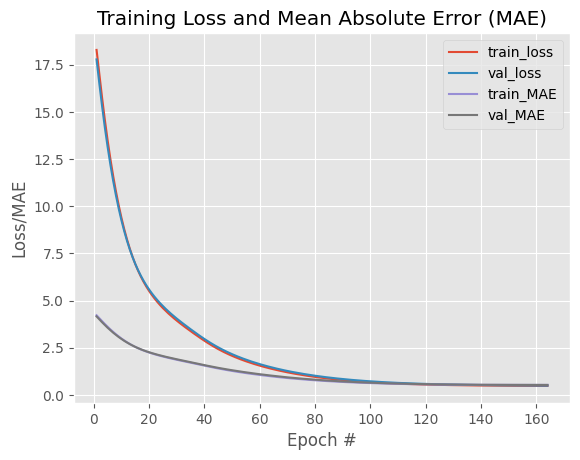

In [ ]:
# PRUEBA 3 CAMBIAMOS LA FUNCION
activation_function = tf.nn.sigmoid
learning_rate = 0.001
lr_decay = 1e-4
num_epochs = 256
batch_size = 512
train_network_features1(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

In [ ]:
# PRUEBA 4 funcion tanh
activation_function = tf.nn.tanh
learning_rate = 0.001
lr_decay = 1e-3
num_epochs = 256
batch_size = 512
train_network_features1(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

[INFO]: Entrenando red neuronal...
Epoch 1/256
3/3 [==============================] - 1s 125ms/step - loss: 22.9532 - mean_absolute_error: 4.7397 - val_loss: 22.4857 - val_mean_absolute_error: 4.6998
Epoch 2/256
3/3 [==============================] - 0s 25ms/step - loss: 21.9219 - mean_absolute_error: 4.6438 - val_loss: 21.4625 - val_mean_absolute_error: 4.5981
Epoch 3/256
3/3 [==============================] - 0s 22ms/step - loss: 20.8527 - mean_absolute_error: 4.5331 - val_loss: 20.3108 - val_mean_absolute_error: 4.4743
Epoch 4/256
3/3 [==============================] - 0s 29ms/step - loss: 19.6450 - mean_absolute_error: 4.4003 - val_loss: 18.9705 - val_mean_absolute_error: 4.3224
Epoch 5/256
3/3 [==============================] - 0s 40ms/step - loss: 18.2410 - mean_absolute_error: 4.2369 - val_loss: 17.4477 - val_mean_absolute_error: 4.1406
Epoch 6/256
3/3 [==============================] - 0s 32ms/step - loss: 16.6587 - mean_absolute_error: 4.0425 - val_loss: 15.7138 - val_mean_abs

Depues de probar con varios learning rate, decay, número de epochs y funciones, la mejor combinación es
* PRUEBA 1:
activation_function = tf.nn.relu
learning_rate = 0.001
lr_decay = 1e-3
num_epochs = 512
batch_size = 512
train_network_features1(activation_function, learning_rate, lr_decay, batch_size, num_epochs)


Mean Absolute Error (MAE): 0.42235173990152114

Mean Squared Error (MSE): 0.32753216946674

Root Mean Squared Error (RMSE): 0.5723042630163959

Desviación del precio: 1.5255450253803902

R² (Coefficient of Determination): 0.33045737550170895



### 2.3.2 MODELO MLP CON AJUSTES 1

In [ ]:
def train_network_features2(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
)
  model = Sequential()

  model.add(Input(shape=(15,), name="FNT2IN"))

  model.add(Dense(100, input_shape = (15,),
                  kernel_initializer='random_uniform',
                  bias_initializer='zeros',
                  name = 'FNT2_1'))
  model.add(BatchNormalization())
  model.add(Activation(activation_function))
  model.add(Dense(50, input_shape = (100,),
                  kernel_regularizer=l1_l2(0.01, 0.01),
                  name = 'FNT2_2'))
  model.add(BatchNormalization())
  model.add(Activation(activation_function))
  model.add(Dense(10, input_shape = (50,), activation=activation_function,
                  name = 'FNT2_3'))

  model.add(Dense(1, input_shape = (10,), activation="linear", name = 'FNT2Out'))

  # Compilamos y entrenamos un modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
    # Implementar un callback para el decay:
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1,
      decay_rate=lr_decay)

  model.compile(loss= loss, optimizer=Adam(learning_rate=lr_schedule), metrics=metrics)



  # Entrenar la solución
  H = model.fit(XtrainScaled, y_train, validation_data=(XvalScaled, y_val),
                epochs=num_epochs, batch_size=batch_size,
                callbacks=[earlyStopping_callback])
  model.summary()

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(XtestScaled, y_test, verbose=0) # Metricas

  preds = model.predict(XtestScaled, batch_size=batch_size) # Predicciones

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = mean_squared_error(y_test, preds, squared=False)
  r2 = r2_score(y_test, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Desviación del precio:", error_price)
  print("R² (Coefficient of Determination):", r2)
  print('----------------------------------')

 # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()

Entrenamos un MLP con los datos de la última prueba y los ajustes

[INFO]: Entrenando red neuronal...
Epoch 1/256
3/3 [==============================] - 3s 346ms/step - loss: 34.0577 - mean_absolute_error: 5.2376 - val_loss: 29.4334 - val_mean_absolute_error: 4.8234
Epoch 2/256
3/3 [==============================] - 0s 37ms/step - loss: 30.0919 - mean_absolute_error: 4.8684 - val_loss: 28.9565 - val_mean_absolute_error: 4.7765
Epoch 3/256
3/3 [==============================] - 0s 31ms/step - loss: 26.8594 - mean_absolute_error: 4.5351 - val_loss: 28.5361 - val_mean_absolute_error: 4.7350
Epoch 4/256
3/3 [==============================] - 0s 39ms/step - loss: 24.1692 - mean_absolute_error: 4.2311 - val_loss: 28.1260 - val_mean_absolute_error: 4.6944
Epoch 5/256
3/3 [==============================] - 0s 34ms/step - loss: 21.9512 - mean_absolute_error: 3.9582 - val_loss: 27.7066 - val_mean_absolute_error: 4.6525
Epoch 6/256
3/3 [==============================] - 0s 32ms/step - loss: 20.0788 - mean_absolute_error: 3.7109 - val_loss: 27.2803 - val_mean_abs

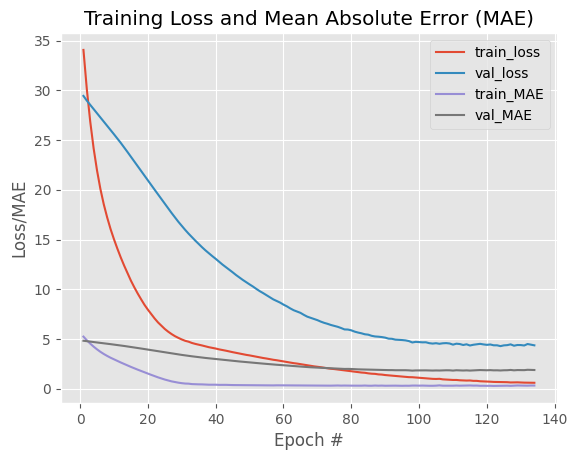

In [ ]:
activation_function = tf.nn.relu
learning_rate = 0.001
lr_decay = 1e-4
num_epochs = 256
batch_size = 512
train_network_features2(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

No mejora con los ajustes anteriores.

### 2.3.3. MODELO MLP CON AJUSTES 2

Eliminamos los BatchnNormalizares

In [ ]:
def train_network_features3(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
)
  model = Sequential()

  model.add(Input(shape=(15,), name="FNT3IN"))

  model.add(Dense(100, input_shape = (15,),
                  activation = activation_function,
                  kernel_regularizer=l2(0.01),
                  kernel_initializer='random_uniform',
                  bias_initializer='zeros',
                  name = 'FNT3_1'))
  model.add(Dense(50, input_shape = (100,),
                  activation = activation_function,
                  kernel_regularizer=l2(0.01),
                  name = 'FNT3_2'))
  model.add(Dense(10, input_shape = (50,), activation=activation_function,
                  name = 'FNT3_3'))

  model.add(Dense(1, input_shape = (10,), activation="linear", name = 'FNT3Out'))

  # Compilamos y entrenamos un modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
    # Implementar un callback para el decay:
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1,
      decay_rate=lr_decay)

  model.compile(loss= loss, optimizer=Adam(learning_rate=lr_schedule), metrics=metrics)



  # Entrenar la solución
  H = model.fit(XtrainScaled, y_train, validation_data=(XvalScaled, y_val),
                epochs=num_epochs, batch_size=batch_size,
                callbacks=[earlyStopping_callback])
  model.summary()

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(XtestScaled, y_test, verbose=0) # Metricas

  preds = model.predict(XtestScaled, batch_size=batch_size) # Predicciones
  predsTrain = model.predict(XtrainScaled, batch_size=batch_size)
  predsVal =  model.predict(XvalScaled, batch_size=batch_size)

  np.save('/content/drive/MyDrive/Keepcoding_DL/predsMLPTrain.npy', predsTrain)
  np.save('/content/drive/MyDrive/Keepcoding_DL/predsMLPVal.npy', predsVal)
  np.save('/content/drive/MyDrive/Keepcoding_DL/predsMLPTest.npy', preds)

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = mean_squared_error(y_test, preds, squared=False)
  r2 = r2_score(y_test, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Desviación del precio:", error_price)
  print("R² (Coefficient of Determination):", r2)
  print('----------------------------------')

 # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()

In [ ]:
activation_function = tf.nn.relu
learning_rate = 0.001
lr_decay = 1e-4
num_epochs = 256
batch_size = 512
train_network_features3(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

[INFO]: Entrenando red neuronal...
Epoch 1/256
3/3 [==============================] - 2s 137ms/step - loss: 23.5830 - mean_absolute_error: 4.7347 - val_loss: 23.2431 - val_mean_absolute_error: 4.6994
Epoch 2/256
3/3 [==============================] - 0s 31ms/step - loss: 22.4844 - mean_absolute_error: 4.6192 - val_loss: 22.0313 - val_mean_absolute_error: 4.5705
Epoch 3/256
3/3 [==============================] - 0s 27ms/step - loss: 21.2278 - mean_absolute_error: 4.4830 - val_loss: 20.6501 - val_mean_absolute_error: 4.4184
Epoch 4/256
3/3 [==============================] - 0s 32ms/step - loss: 19.7968 - mean_absolute_error: 4.3212 - val_loss: 19.1037 - val_mean_absolute_error: 4.2408
Epoch 5/256
3/3 [==============================] - 0s 33ms/step - loss: 18.1936 - mean_absolute_error: 4.1314 - val_loss: 17.3803 - val_mean_absolute_error: 4.0324
Epoch 6/256
3/3 [==============================] - 0s 31ms/step - loss: 16.4348 - mean_absolute_error: 3.9119 - val_loss: 15.4901 - val_mean_abs

Despúes de varias pruebas hemos observado mejoría con el último modelo.

Mean Absolute Error (MAE): 0.36966445522426045

Mean Squared Error (MSE): 0.25549741832764156

Root Mean Squared Error (RMSE): 0.5054675245034458

Desviación del precio: 1.4472489163680367

R² (Coefficient of Determination): 0.4777111136956633

# 3. MODELO CON IMAGENES

## 3.1. PREPARACION IMAGENES CNN

In [ ]:
data_imagen = np.load('/content/drive/MyDrive/Keepcoding_DL/images_KC.npy')

# Cargar los índices desde archivos npy
index_train_loaded = np.load('/content/drive/MyDrive/Keepcoding_DL/index_train.npy')
index_val_loaded = np.load('/content/drive/MyDrive/Keepcoding_DL/index_val.npy')
index_test_loaded = np.load('/content/drive/MyDrive/Keepcoding_DL/index_test.npy')

# Convertirlos a índices de pandas
index_train = pd.Index(index_train_loaded)
index_val  = pd.Index(index_val_loaded)
index_test = pd.Index(index_test_loaded)


# Verificar las formas de los datos
print('Shape de las imágenes:', data_imagen.shape)
X_train_pic = data_imagen[index_train]
X_val_pic = data_imagen[index_val]
X_test_pic = data_imagen[index_test]
y_train_lab = y_train
y_val_lab = y_val
y_test_lab = y_test

print('Shape de imagenes_train:', X_train_pic.shape)
print('Shape de labels_train:', y_train_lab.shape)
print('Shape de imagenes_val:', X_val_pic.shape)
print('Shape de labels_val:', y_val_lab.shape)
print('Shape de imagenes_test:', X_test_pic.shape)
print('Shape de labels_test:', y_test_lab.shape)


Shape de las imágenes: (2135, 224, 224, 3)
Shape de imagenes_train: (1366, 224, 224, 3)
Shape de labels_train: (1366,)
Shape de imagenes_val: (342, 224, 224, 3)
Shape de labels_val: (342,)
Shape de imagenes_test: (427, 224, 224, 3)
Shape de labels_test: (427,)


## 3.2. IMPLEMENTACION DE CNN

In [ ]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_image1(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10)
  # Implementamos la red empleando Keras
  model = Sequential()
  model.add(Conv2D(filters=64,
                 kernel_size =(3,3),
                 activation = activation_function,
                 input_shape=(224,224,3),
                 name = 'COVTI1_1'))
  model.add(Conv2D(filters=32, kernel_size = (3,3),
                   activation = activation_function,
                   name = 'COVTI1_2'))
  model.add(GlobalAveragePooling2D())
  model.add(Dense(32, activation=activation_function,
                  name = 'TI1_1'))
  model.add(Dense(1, activation="linear",  name = 'TI1Out')
           )
  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1,
      decay_rate=lr_decay)
  model.compile(loss= loss,
                optimizer=Adam(learning_rate = lr_schedule),
                metrics= metrics)

  H = model.fit(X_train_pic, y_train_lab,
                validation_data=(X_val_pic, y_val_lab),
                epochs=num_epochs,
                batch_size=batch_size,
                callbacks =([earlyStopping_callback]))
  model.summary()

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(X_test_pic, y_test_lab, verbose=0) # Metricas

  preds = model.predict(X_test_pic, batch_size=batch_size) # Predicciones

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test_lab, preds)
  mse = mean_squared_error(y_test_lab, preds)
  rmse = mean_squared_error(y_test_lab, preds, squared=False)
  r2 = r2_score(y_test_lab, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("R² (Coefficient of Determination):", r2)
  print("Desviación del precio:", error_price)
  print('----------------------------------')

 # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()

In [ ]:
activation_function = tf.nn.sigmoid
learning_rate = 0.001
lr_decay = 0.001
num_epochs = 60
batch_size = 8 #He tenido que bajar el batch size porque se me disparaba la capacidad de la RAM
train_image1(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

[INFO]: Entrenando red neuronal...
Epoch 1/60
171/171 [==============================] - 7s 35ms/step - loss: 8.6688 - mean_absolute_error: 2.6340 - val_loss: 1.9825 - val_mean_absolute_error: 1.2389
Epoch 2/60
171/171 [==============================] - 5s 31ms/step - loss: 0.9043 - mean_absolute_error: 0.7450 - val_loss: 0.5599 - val_mean_absolute_error: 0.5573
Epoch 3/60
171/171 [==============================] - 5s 31ms/step - loss: 0.4900 - mean_absolute_error: 0.5391 - val_loss: 0.4877 - val_mean_absolute_error: 0.5311
Epoch 4/60
171/171 [==============================] - 6s 32ms/step - loss: 0.4763 - mean_absolute_error: 0.5377 - val_loss: 0.4847 - val_mean_absolute_error: 0.5307
Epoch 5/60
171/171 [==============================] - 5s 30ms/step - loss: 0.4761 - mean_absolute_error: 0.5392 - val_loss: 0.4834 - val_mean_absolute_error: 0.5307
Epoch 6/60
171/171 [==============================] - 5s 32ms/step - loss: 0.4761 - mean_absolute_error: 0.5388 - val_loss: 0.4831 - val_mea

## 3.3 FINE TUNNING VGG19

Voy a usar una estructura VGG19 que acepta imágenes de shape 224x224x3 igual que las que ya tenemos, y los pesos los vamos a inicializar con los de 'imagenet'.

Primero cargamos las imágenes como están divididas por 255 las devolvemos a su estado original y aplicamos el preprocesamiento de VGG19.

### 3.3.1 CARGA DE IMAGENES
Vamos a volver a tratar las imágenes para normalizarlas el modelo preentrenado que vamos a usar VGG19.

Lo hago de esta manera para facilitar durante la practica la carga solo desde este punto.

In [ ]:
data_imagen = np.load('/content/drive/MyDrive/Keepcoding_DL/images_KC.npy')

data_imagen = data_imagen *255

preprocess = imagenet_utils.preprocess_input

data_imagen = preprocess(data_imagen)

# Cargar los índices desde archivos npy
index_train_loaded = np.load('/content/drive/MyDrive/Keepcoding_DL/index_train.npy')
index_val_loaded = np.load('/content/drive/MyDrive/Keepcoding_DL/index_val.npy')
index_test_loaded = np.load('/content/drive/MyDrive/Keepcoding_DL/index_test.npy')

# Convertirlos a índices de pandas
index_train = pd.Index(index_train_loaded)
index_val  = pd.Index(index_val_loaded)
index_test = pd.Index(index_test_loaded)


X_train_pic = data_imagen[index_train]
X_val_pic = data_imagen[index_val]
X_test_pic = data_imagen[index_test]

y_train_lab = y_train
y_val_lab = y_val
y_test_lab = y_test

print('Shape de imagenes_train:', X_train_pic.shape)
print('Shape de labels_train:', y_train_lab.shape)
print('Shape de imagenes_val:', X_val_pic.shape)
print('Shape de labels_val:', y_val_lab.shape)
print('Shape de imagenes_test:', X_test_pic.shape)
print('Shape de labels_test:', y_test_lab.shape)




Shape de imagenes_train: (1366, 224, 224, 3)
Shape de labels_train: (1366,)
Shape de imagenes_val: (342, 224, 224, 3)
Shape de labels_val: (342,)
Shape de imagenes_test: (427, 224, 224, 3)
Shape de labels_test: (427,)


### 3.3.2. COMPROBACION DE LA ESTRUCTURA DEL MODELO PREENTRENADO

In [ ]:
input_shape = (224, 224, 3)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

### 3.3.3. CONGELAR TODAS LAS CAPAS
Voy primero a congelar todas las capas y luego añadir un MLP para la predicción del precio.


In [ ]:
def train_image2(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  input_shape = (224, 224, 3)
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5)

  base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
  for layer in base_model.layers:
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada.')

  last = base_model.layers[-1].output
  x = Flatten()(last)
  x = Dense(32, activation=activation_function,
                    name = 'D1')(x)
  x = Dense(1, activation="linear",  name = 'DOut')(x)

  model = Model(base_model.input, x)

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1000,
      decay_rate=lr_decay)
  model.compile(loss= loss,
                  optimizer=Adam(lr_schedule),
                  metrics= metrics)

  H = model.fit(X_train_pic, y_train_lab, validation_data=(X_val_pic, y_val_lab),
                epochs=num_epochs, batch_size=batch_size,
                callbacks = ([earlyStopping_callback]))

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(X_test_pic, y_test_lab, verbose=0) # Metricas

  preds = model.predict(X_test_pic, batch_size=batch_size) # Predicciones
  predsCNNTrain = model.predict(X_train_pic, batch_size=batch_size)
  predsCNNVal = model.predict(X_val_pic, batch_size=batch_size)

  # Guardar las predicciones para usarlas posteriormente en Late Fusion
  np.save('/content/drive/MyDrive/Keepcoding_DL/predsCNNTrain.npy', predsCNNTrain)
  np.save('/content/drive/MyDrive/Keepcoding_DL/predsCNNVal.npy', predsCNNVal)
  np.save('/content/drive/MyDrive/Keepcoding_DL/predsCNNTest.npy', preds)

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test_lab, preds)
  mse = mean_squared_error(y_test_lab, preds)
  rmse = mean_squared_error(y_test_lab, preds, squared=False)
  r2 = r2_score(y_test_lab, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("R² (Coefficient of Determination):", r2)
  print("Desviación del precio:", error_price)
  print('----------------------------------')

  # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()



80134624/80134624 [==============================] - 0s 0us/step
Capa input_1 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_conv4 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_conv4 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_conv4 congelada.
Capa block5_pool congelada.
[INFO]: Entrenando red neuronal...
Epoch 1/100
11/11 [==============================] - 52s 3s/step - loss: 10.4748 - mean_absolute_error: 2.9712 - val_loss: 7.2765 - val_mean_absolute_error: 2.6067
Epoch 2/100
11/11 [==============================] - 11s 978ms/step - loss: 6.7017 - mean_absolute_error: 2.

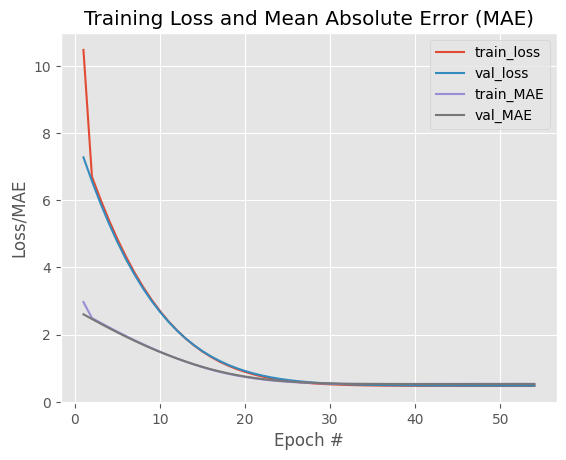

In [ ]:
  activation_function = tf.nn.sigmoid
  num_epochs = 100
  batch_size = 128
  learning_rate = 0.001
  lr_decay = 1e-4
  train_image2(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

### 3.3.4 LIBERAR LA ULTIMA CAPA

In [ ]:
def train_image3(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  input_shape = (224, 224, 3)
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5)
  base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
  for layer in base_model.layers:
    if layer.name == 'block5_conv1':
      break
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada.')

  last = base_model.layers[-1].output
  x = Flatten()(last)
  x = Dense(32, activation=activation_function,
                    name = 'D1')(x)
  x = Dense(1, activation="linear",  name = 'DOut')(x)

  model = Model(base_model.input, x)

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1000,
      decay_rate=lr_decay)
  model.compile(loss= loss,
                  optimizer=Adam(lr_schedule),
                  metrics= metrics)

  H = model.fit(X_train_pic, y_train_lab, validation_data=(X_val_pic, y_val_lab),
                epochs=num_epochs, batch_size=batch_size,
                callbacks = ([earlyStopping_callback]))

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(X_test_pic, y_test_lab, verbose=0) # Metricas

  preds = model.predict(X_test_pic, batch_size=batch_size) # Predicciones

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test_lab, preds)
  mse = mean_squared_error(y_test_lab, preds)
  rmse = mean_squared_error(y_test_lab, preds, squared=False)
  r2 = r2_score(y_test_lab, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("R² (Coefficient of Determination):", r2)
  print("Desviación del precio:", error_price)
  print('----------------------------------')

  # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()


Capa input_2 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_conv4 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_conv4 congelada.
Capa block4_pool congelada.
[INFO]: Entrenando red neuronal...
Epoch 1/100
6/6 [==============================] - 64s 2s/step - loss: 8.2935 - mean_absolute_error: 2.4051 - val_loss: 3.4566 - val_mean_absolute_error: 1.7254
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 3.1641 - mean_absolute_error: 1.6397 - val_loss: 3.1318 - val_mean_absolute_error: 1.6291
Epoch 3/100
6/6 [==============================] - 11s 2s/step - loss: 2.8564 - mean_absolute_error: 1.5437 - val_loss: 2.8277 - val_mean_absolute_error: 1.534

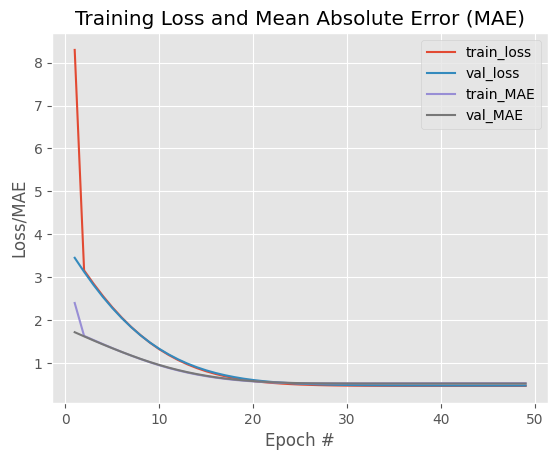

In [ ]:
  activation_function = tf.nn.sigmoid
  num_epochs = 100
  batch_size = 256
  learning_rate = 0.001
  lr_decay = 1e-4
  train_image3(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

## 3.4. DATA AUGMENTATION

In [ ]:
def train_image3DA(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  input_shape = (224, 224, 3)
  # Callback earlyStopping
  earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5)
  base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
  for layer in base_model.layers:
    if layer.name == 'block5_conv1':
      break
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada.')

  last = base_model.layers[-1].output
  x = Flatten()(last)
  x = Dense(32, activation=activation_function,
                    name = 'D1')(x)
  x = Dense(1, activation="linear",  name = 'DOut')(x)

  model = Model(base_model.input, x)

  # Compilamos y entrenamos el modelo
  print("[INFO]: Entrenando red neuronal...")
  loss = 'mse'
  metrics = ['mean_absolute_error']
  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=learning_rate,
      decay_steps=1000,
      decay_rate=lr_decay)

  model.compile(loss= loss,
                  optimizer=Adam(lr_schedule),
                  metrics= metrics)

  datagen_train = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True
    )
  datagen_train.fit(X_train_pic)
  train_steps_per_epoch = X_train_pic.shape[0] / batch_size
  val_steps_per_epoch = X_val_pic.shape[0] / batch_size ## CODE ##
  H = model.fit(datagen_train.flow(X_train_pic, y_train_lab, batch_size=batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=num_epochs,
                    validation_data=(X_val_pic, y_val_lab),
                    validation_steps=val_steps_per_epoch,
                    callbacks = ([earlyStopping_callback]))

  # Evaluar el modelo con el dataset de test
  score = model.evaluate(X_test_pic, y_test_lab, verbose=0) # Metricas

  preds = model.predict(X_test_pic, batch_size=batch_size) # Predicciones

  print("[INFO]: Evaluando red neuronal...")
  # Evaluación con distintas métricas
  mae = mean_absolute_error(y_test_lab, preds)
  mse = mean_squared_error(y_test_lab, preds)
  rmse = mean_squared_error(y_test_lab, preds, squared=False)
  r2 = r2_score(y_test_lab, preds)
  error_price = np.exp(mae)

  print('----------------------------------')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("R² (Coefficient of Determination):", r2)
  print("Desviación del precio:", error_price)
  print('----------------------------------')

  # Muestro gráfica de MAE y loss
  plt.style.use("ggplot")
  plt.figure()
  epochs = range(1, len(H.history["loss"]) + 1)
  plt.plot(epochs, H.history["loss"], label="train_loss")
  plt.plot(epochs, H.history["val_loss"], label="val_loss")
  plt.plot(epochs, H.history["mean_absolute_error"], label="train_MAE")
  plt.plot(epochs, H.history["val_mean_absolute_error"], label="val_MAE")
  plt.title("Training Loss and Mean Absolute Error (MAE)")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/MAE")
  plt.legend()

Capa input_3 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_conv4 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_conv4 congelada.
Capa block4_pool congelada.
[INFO]: Entrenando red neuronal...
Epoch 1/100
5/5 [==============================] - 25s 4s/step - loss: 5.5934 - mean_absolute_error: 1.9353 - val_loss: 2.3549 - val_mean_absolute_error: 1.3762
Epoch 2/100
5/5 [==============================] - 23s 4s/step - loss: 2.0957 - mean_absolute_error: 1.2772 - val_loss: 2.0687 - val_mean_absolute_error: 1.2718
Epoch 3/100
5/5 [==============================] - 25s 5s/step - loss: 1.8212 - mean_absolute_error: 1.1697 - val_loss: 1.8113 - val_mean_absolute_error: 1.170

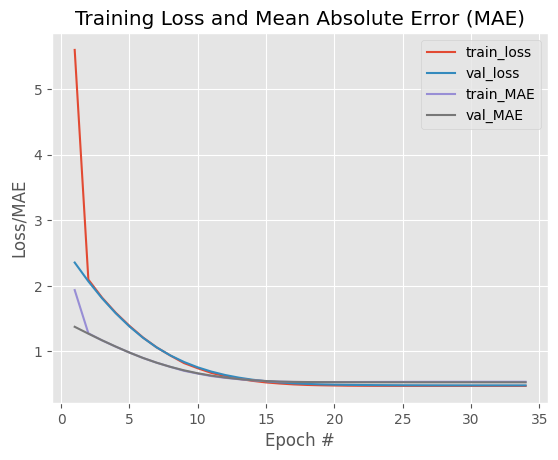

In [ ]:
  activation_function = tf.nn.sigmoid
  num_epochs = 100
  batch_size = 256
  learning_rate = 0.001
  lr_decay = 1e-4
  train_image3DA(activation_function, learning_rate, lr_decay, batch_size, num_epochs)

Debido al problema presentado no observamos en este caso una mejora de resultados con data Augmentation.

He tenido que limitar el aumeto de datos porque con más de nuevo tenía problemas de recursos y se me saturaba o la RAM o el GPU.

## 3.5 OPTIMIZACION PARÁMETROS

Aun cambiando parámetros me da error de espacio en la GPU y se agota el uso de la GPU o de la RAM.

Asi que he eliminado esta parte que hice con hiperopt.

También he prabado con un gridsearch pero tarda bastante.

# 4. LATE FUSION
Creo desde aqui los modelos MLP y CNN para esta parte para ir ejectuando solo las partes que voy a probar, por comodidad y recursos.

## 4.1 CARGAR LAS PREDICCIONS ANTERIORES

In [ ]:
# Cargar las predicciones guardadas
# He cargado las predicciones previas de uno de los MLP y de CNN pre-entrenada
predsMLPTrain = np.load('/content/drive/MyDrive/Keepcoding_DL/predsMLPTrain.npy')
predsCNNTrain = np.load('/content/drive/MyDrive/Keepcoding_DL/predsCNNTrain.npy')

predsMLPVal = np.load('/content/drive/MyDrive/Keepcoding_DL/predsMLPVal.npy')
predsCNNVal = np.load('/content/drive/MyDrive/Keepcoding_DL/predsCNNVal.npy')

predsMLPTest = np.load('/content/drive/MyDrive/Keepcoding_DL/predsMLPTest.npy')
predsCNNTest = np.load('/content/drive/MyDrive/Keepcoding_DL/predsCNNTest.npy')
# Concatenar las predicciones

features_late_fusion_train = np.concatenate((predsMLPTrain, predsCNNTrain), axis=1)
features_late_fusion_val = np.concatenate((predsMLPVal, predsCNNVal), axis=1)
features_late_fusion_test = np.concatenate((predsMLPTest, predsCNNTest), axis=1)

## 4.2. MODELO LATE FUSION

In [ ]:
# Definir el modelo de late fusion
earlyStopping_callback = keras.callbacks.EarlyStopping(
  monitor="val_loss",
  min_delta=0.001,
  patience=10,
)
model_fusion = Sequential([
    Input(shape=(2,), name="LF2IN"),
    Dense(256, activation='tanh',
          kernel_regularizer = l1(0.01),
          name='LF2_1'),
    Dropout(0.2),
    Dense(128, activation='tanh',
          kernel_regularizer =l1(0.01),
          name='LF2_2'),
    Dropout(0.2),
    Dense(64, activation='sigmoid',
          kernel_regularizer = l1(0.01),
          name='LF2_3'),
    Dense(1, activation="linear", name='LF2Out')
])
loss = 'mse'
metrics = ['mean_absolute_error']
lr_schedule_fusion = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=1e-4
)

model_fusion.compile(loss=loss,
                     optimizer=Adam(learning_rate=lr_schedule_fusion),
                     metrics=metrics
                     )

H_fusion = model_fusion.fit(features_late_fusion_train,
                            y_train,
                            epochs=256,
                            batch_size=256,
                            validation_data=(features_late_fusion_val, y_val_lab),
                            callbacks=[earlyStopping_callback])

# Evaluar el modelo de fusión
preds_fusion = model_fusion.predict(features_late_fusion_test, batch_size=256)


Epoch 1/256
6/6 [==============================] - 3s 59ms/step - loss: 46.5394 - mean_absolute_error: 4.2074 - val_loss: 35.8617 - val_mean_absolute_error: 2.7775
Epoch 2/256
6/6 [==============================] - 0s 14ms/step - loss: 33.4478 - mean_absolute_error: 2.3045 - val_loss: 29.8962 - val_mean_absolute_error: 1.4915
Epoch 3/256
6/6 [==============================] - 0s 13ms/step - loss: 29.0647 - mean_absolute_error: 1.2551 - val_loss: 27.6068 - val_mean_absolute_error: 0.8255
Epoch 4/256
6/6 [==============================] - 0s 15ms/step - loss: 27.1485 - mean_absolute_error: 0.7315 - val_loss: 26.3267 - val_mean_absolute_error: 0.5693
Epoch 5/256
6/6 [==============================] - 0s 16ms/step - loss: 25.9558 - mean_absolute_error: 0.5583 - val_loss: 25.2992 - val_mean_absolute_error: 0.5244
Epoch 6/256
6/6 [==============================] - 0s 13ms/step - loss: 24.9328 - mean_absolute_error: 0.5282 - val_loss: 24.3002 - val_mean_absolute_error: 0.5274
Epoch 7/256
6/6 

## 4.3. EVALUACION DEL MODELO

----------------------------------
Mean Absolute Error (MAE): 0.5502049554323242
Mean Squared Error (MSE): 0.4912591435907071
Root Mean Squared Error (RMSE): 0.7008988112350506
Desviación del precio: 1.7336082938956316
R² (Coefficient of Determination): -0.004233986676858814
----------------------------------


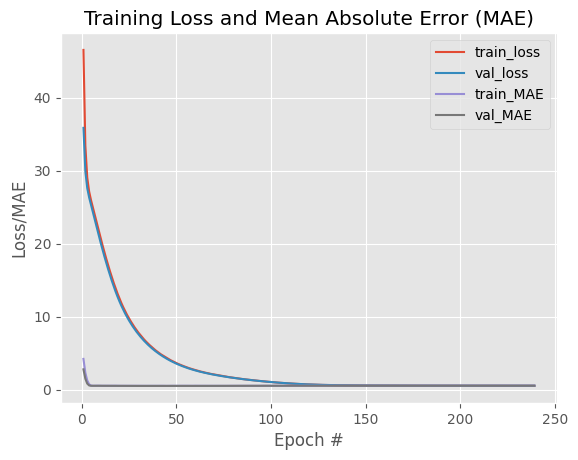

In [ ]:
# Evaluar con distintas métricas
mae = mean_absolute_error(y_test, preds_fusion)
mse = mean_squared_error(y_test, preds_fusion)
rmse = mean_squared_error(y_test, preds_fusion, squared=False)
r2 = r2_score(y_test, preds_fusion)
error_price = np.exp(mae)

print('----------------------------------')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Desviación del precio:", error_price)
print("R² (Coefficient of Determination):", r2)
print('----------------------------------')
# Grafica
plt.style.use("ggplot")
plt.figure()
epochs = range(1, len(H_fusion.history["loss"]) + 1)
plt.plot(epochs, H_fusion.history["loss"], label="train_loss")
plt.plot(epochs, H_fusion.history["val_loss"], label="val_loss")
plt.plot(epochs, H_fusion.history["mean_absolute_error"], label="train_MAE")
plt.plot(epochs, H_fusion.history["val_mean_absolute_error"], label="val_MAE")
plt.title("Training Loss and Mean Absolute Error (MAE)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend()
plt.show()


# 5. EARLY FUSION

Implementamos un modelo CNN para el dataset de imágenes.

## 5.1 Implementar una CNN preentrenada

In [ ]:
input_shape = (224, 224, 3)
classifier2D = VGG19(weights='imagenet',
                     include_top=False,
                     input_shape=input_shape)
last_conv = classifier2D.layers[-2].output
last_conv_globalAvg = GlobalAveragePooling2D()(last_conv)
feature_extractor = Model(classifier2D.input, last_conv_globalAvg)

loss = 'mse'
metrics = ['mean_absolute_error']
lr_schedule_cnn = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=1e-4
)



## 5.2 UNIR DATOS TABULARES E IMAGENES

In [ ]:
# Extraer características del conjunto de datos de imágenes
features_train = feature_extractor.predict(X_train_pic, batch_size=256)
features_val = feature_extractor.predict(X_val_pic, batch_size=256)
features_test = feature_extractor.predict(X_test_pic, batch_size=256)
# Concatenar características de imágenes con datos tabulares
X_train_combined = np.concatenate([XtrainScaled, features_train], axis=1)
X_val_combined = np.concatenate([XvalScaled, features_val], axis=1)
X_test_combined = np.concatenate([XtestScaled, features_test], axis=1)


2/2 [==============================] - 2s 2s/step


## 5.3. MODEL COMBINADO

In [ ]:
# Definir el modelo combinado
earlyStopping_callback = keras.callbacks.EarlyStopping(
  monitor="val_loss",
  min_delta=0.001,
  patience=10,
)
input_shape = X_train_combined.shape[1]

model_combined = Sequential([
    Input(shape=(input_shape,), name="LF1IN"),
    Dense(256, activation='tanh',
          kernel_initializer='random_uniform',
          bias_initializer='zeros',
          kernel_regularizer=l1_l2(0.01,0.01),
          name='LF1_1'),
    Dense(128, activation='tanh',
          kernel_regularizer=l1_l2(0.01,0.01),
          name='LNF1_2'),
    Dense(1, activation="linear",
          name='TNF1Out')
])

lr_schedule_combined = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.0001,
    decay_steps=1,
    decay_rate=1e-4
)

model_combined.compile(loss=loss,
                       optimizer=Adam(learning_rate=lr_schedule_combined),
                       metrics=metrics)
H_combined = model_combined.fit(X_train_combined, y_train,
                                validation_data=(X_val_combined, y_val),
                                epochs=2048,
                                batch_size=516,
                                callbacks = [earlyStopping_callback])


Epoch 1/2048
3/3 [==============================] - 2s 95ms/step - loss: 73.2344 - mean_absolute_error: 3.9138 - val_loss: 67.4795 - val_mean_absolute_error: 3.1072
Epoch 2/2048
3/3 [==============================] - 0s 25ms/step - loss: 65.9752 - mean_absolute_error: 2.8416 - val_loss: 62.1621 - val_mean_absolute_error: 2.0898
Epoch 3/2048
3/3 [==============================] - 0s 26ms/step - loss: 61.3085 - mean_absolute_error: 1.8625 - val_loss: 59.1724 - val_mean_absolute_error: 1.2513
Epoch 4/2048
3/3 [==============================] - 0s 25ms/step - loss: 58.8296 - mean_absolute_error: 1.1227 - val_loss: 57.9081 - val_mean_absolute_error: 0.8550
Epoch 5/2048
3/3 [==============================] - 0s 23ms/step - loss: 57.8758 - mean_absolute_error: 0.8352 - val_loss: 57.6463 - val_mean_absolute_error: 0.8594
Epoch 6/2048
3/3 [==============================] - 0s 32ms/step - loss: 57.7184 - mean_absolute_error: 0.8723 - val_loss: 57.7222 - val_mean_absolute_error: 0.9792
Epoch 7/20

## 5.4 EVALUAR EL MODELO

In [ ]:
# Evaluar el modelo combinado con el conjunto de prueba
preds_combined = model_combined.predict(X_test_combined, batch_size=256)

mae = mean_absolute_error(y_test, preds_combined)
mse = mean_squared_error(y_test, preds_combined)
rmse = mean_squared_error(y_test, preds_combined, squared=False)
r2 = r2_score(y_test, preds_combined)
error_price = np.exp(mae)

print('----------------------------------')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Desviación del precio:", error_price)
print("R² (Coefficient of Determination):", r2)
print('----------------------------------')

# Mostrar gráfica de MAE y loss
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
epochs = range(1, len(H_combined.history["loss"]) + 1)
plt.plot(epochs, H_combined.history["loss"], label="train_loss")
plt.plot(epochs, H_combined.history["val_loss"], label="val_loss")
plt.plot(epochs, H_combined.history["mean_absolute_error"], label="train_MAE")
plt.plot(epochs, H_combined.history["val_mean_absolute_error"], label="val_MAE")
plt.title("Training Loss and Mean Absolute Error (MAE)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend()
plt.show()


2/2 [==============================] - 0s 6ms/step
----------------------------------
Mean Absolute Error (MAE): 0.39158270719933913
Mean Squared Error (MSE): 0.2785746768473027
Root Mean Squared Error (RMSE): 0.5278017400949931
Desviación del precio: 1.4793202728851775
R² (Coefficient of Determination): 0.4305364857480153
----------------------------------


# 6. CONCLUSIONES

Durante el desarrollo del proyecto me he encontrado principalmente con problemas en las limitaciones de uso de la GPU de colab con lo que he tenido que adaptar algunos parámetros como el batch size y las epochs para evitar que se desborde.

He repetido algunos códigos para poder acceder directamente a esa celda durante diferentes días por mi comodidad y no tener que ejecutar otras.

Para evitar los saltos he tenido que ir ajustado el Learning Rate y del decay y también algunas funciones de activación aunque no siempre mejoraba el resultado.

Debido al número limitado de datos ha sido una tarea bastante compleja y los resultados seguro que con más datos y tiempo pueden ser mejorabales.

En cuanto a las imágenes debido al tipo de imágenes no he notado mejoría haciendo data augmentation, he intentado aumentar los datos más incluso con mayores modificaciones pero de nuevo me he encontrado con las limitaciones de uso de Colab.

El mejor modelo ha sido el último Early Fusión con una ligera mejoría sobre los anteriores.
Mean Absolute Error (MAE): 0.39158270719933913

Mean Squared Error (MSE): 0.2785746768473027

Root Mean Squared Error (RMSE): 0.5278017400949931

Desviación del precio: 1.4793202728851775

R² (Coefficient of Determination): 0.4305364857480153